Machine Predictive Maintenence Datasets

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [23]:
df = pd.read_csv(r"./predictive_maintenance.csv", index_col="UDI")
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Target Class Ratio

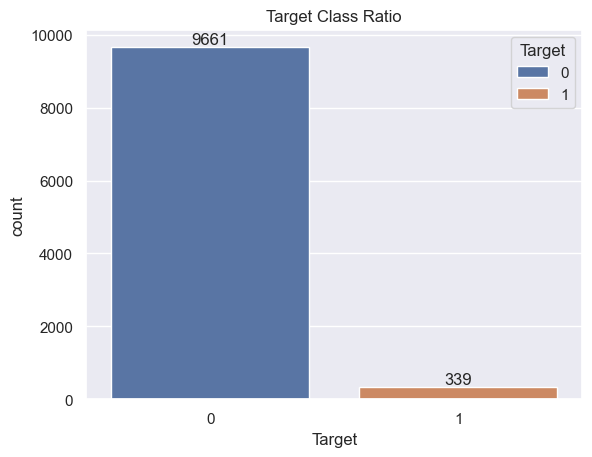

In [47]:
ax = sns.countplot(data=df, x="Target", hue="Target")
for p in ax.patches[:2]:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
ax.set_title("Target Class Ratio")
plt.show()
ax.cla()

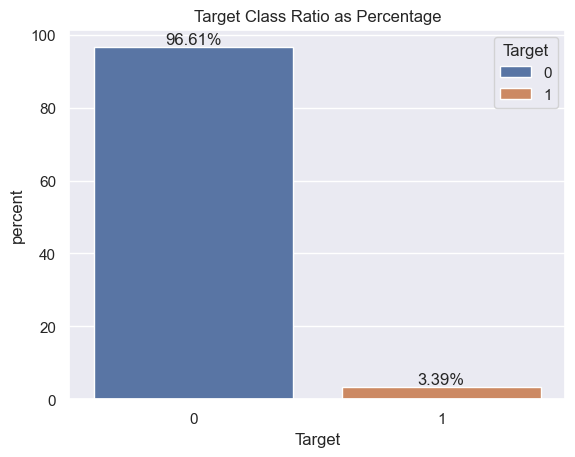

In [44]:
ax = sns.countplot(data=df, x="Target", hue="Target", stat="percent")
for p in ax.patches[:2]:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
ax.set_title("Target Class Ratio as Percentage")
plt.show()
ax.cla()

In [79]:
df_failure = df.loc[df["Target"]==1]
df_failure.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


Failure Types Class Ratio

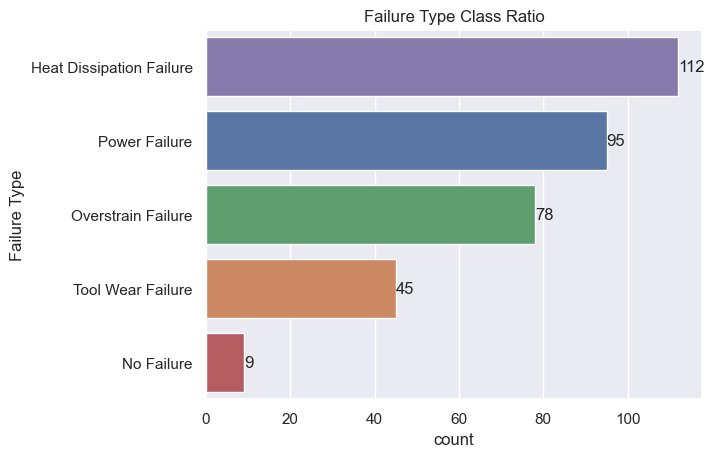

In [77]:
order = df_failure["Failure Type"].value_counts().index
ax = sns.countplot(data=df_failure, y="Failure Type", hue="Failure Type", orient="h", order=order)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.set_title("Failure Type Class Ratio")
plt.show()
ax.cla()

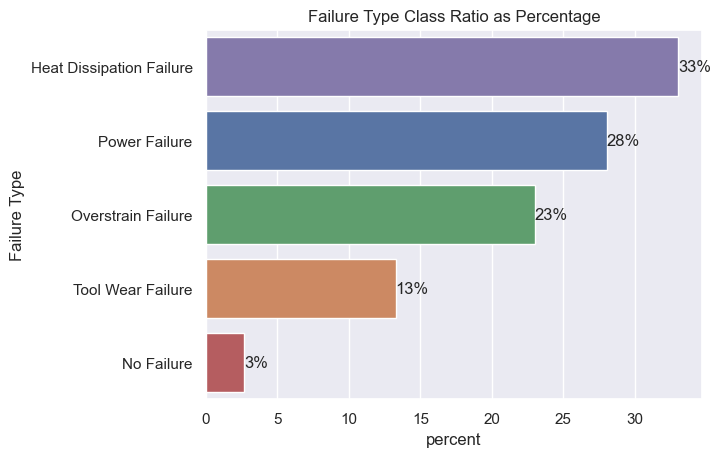

In [78]:
ax = sns.countplot(data=df_failure, y="Failure Type", hue="Failure Type", orient="h", stat="percent", order=order)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}%', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.set_title("Failure Type Class Ratio as Percentage")
plt.show()
ax.cla()